In [1]:
import numpy as np
import matplotlib.pyplot as plt
from hdg_postprocess.formats import load_from_file

# Define location and number of partitions

In [2]:
# name of the meshes without the end with mesh number and the total number of meshes
meshbase = 'West_NoHole_Nel81446_P'
meshpath = 'data/meshes/'
# number of partitions in the mesh
n_partitions = 8
solpath = 'data/solutions/detached/'
# Always drop something like  "1_8.h5" part from the end
solbase = 'Sol2D_West_NoHole_Nel81446_P_DPe0.100E+01_DPai0.314E+06_DPae0.105E+08'

In [3]:
sol=load_from_file.load_HDG_solution_from_file(solpath,solbase,meshpath,meshbase,n_partitions)

# Now mesh is a field of solution

No reference element, the mesh is plotted assuming straight edges


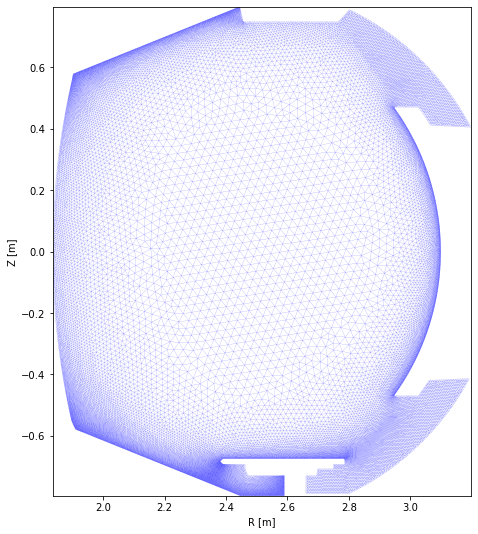

In [6]:
fig,ax = plt.subplots(figsize=(9,9))
ax = sol.mesh.plot_full_mesh(ax=ax)

# Plasma

One can populate solution with phyical values (calculated based on adimensional conservative varaibles)

In [8]:
sol.init_phys_variables()

Initializing simple physical solution full
Comibining first simple solution full
Comibining first solution full
Initializing full physical solution full


they are stored in solution_glob_phys with the shape of [Nelems, Nnodes_per_element, number_of_physical_solutuions]

In [11]:
sol.solution_glob_phys.shape

(81446, 15, 11)

same for gradient_glob_phys with last index corresponding to derivative on R or Z
[Nelems, Nnodes_per_element, number_of_physical_solutuions, Ndim]

In [12]:
sol.gradient_glob_phys.shape

(81446, 15, 11, 2)

To use matplotlib routines to plot there is also solution_simple_phys with shape [Nnodes in mesh, number_of_physical_solutuions]

In [14]:
sol.solution_simple_phys.shape

(657065, 11)

similar for gradient

In [15]:
sol.gradient_simple_phys.shape

(657065, 11, 2)

To know where desired physical variable is stored, on has a dictionary "phys_idx"

In [7]:
sol.phys_idx

{b'rho': 0,
 b'u': 1,
 b'Ei': 2,
 b'Ee': 3,
 b'pi': 4,
 b'pe': 5,
 b'Ti': 6,
 b'Te': 7,
 b'Csi': 8,
 b'M': 9,
 b'rhon': 10}

here rho is plasma density, rhon is neutral density

So if one wants to plot Ti, he/she takes solution_simple_phys[:,6]

No reference element, the mesh is plotted assuming straight edges


/home/ikudashev/Documents/Github/HDG_postprocess/hdg_postprocess/HDG_mesh.py:378: UserWarning: The following kwargs were not used by contour: 'triangles', 'extendrect'
  im = ax.tricontourf(self.vertices_glob[:,0], self.vertices_glob[:,1], data,levels=n_levels


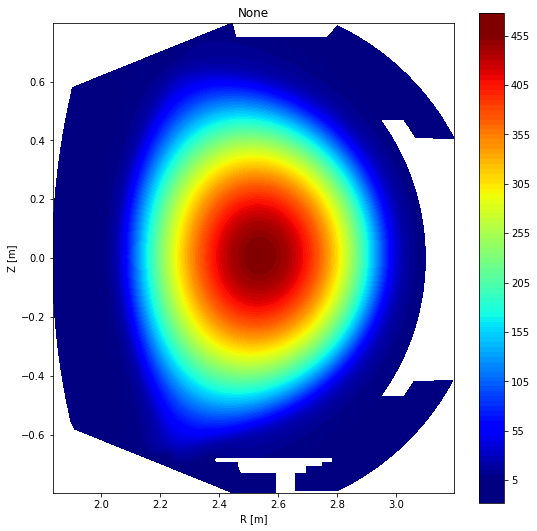

In [16]:
fig,ax = plt.subplots(figsize=(9,9))
ax = sol.mesh.plot_full_mesh(ax=ax,data=sol.solution_simple_phys[:,6])

Or one can plot the overview on main physical variables

/home/ikudashev/Documents/Github/HDG_postprocess/hdg_postprocess/HDG_mesh.py:373: UserWarning: The following kwargs were not used by contour: 'triangles', 'extendrect'
  im = ax.tricontourf(self.vertices_glob[:,0], self.vertices_glob[:,1], np.log10(data),levels=n_levels
/home/ikudashev/Documents/Github/HDG_postprocess/hdg_postprocess/HDG_mesh.py:378: UserWarning: The following kwargs were not used by contour: 'triangles', 'extendrect'
  im = ax.tricontourf(self.vertices_glob[:,0], self.vertices_glob[:,1], data,levels=n_levels


(<Figure size 1080x1620 with 11 Axes>,
 array([[<AxesSubplot:title={'center':'log10(n, m$^{-3}$)'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:title={'center':'log10($n_n$, m$^{-3}$)'}, xlabel='R [m]', ylabel='Z [m]'>],
        [<AxesSubplot:title={'center':'$T_i$'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:title={'center':'$T_e$'}, xlabel='R [m]', ylabel='Z [m]'>],
        [<AxesSubplot:title={'center':'M'}, xlabel='R [m]', ylabel='Z [m]'>,
         <AxesSubplot:>]], dtype=object),
 array([[ 7.41423592e+14,  2.05851538e+16,  6.02559956e-01,
          1.73214737e-01,  1.09002937e+00],
        [ 3.22359399e+15,  2.04580083e+16,  6.27302039e-01,
          1.84294980e-01,  2.05793777e-01],
        [ 3.22296406e+16,  1.85652475e+16,  2.47955559e+00,
          1.25988382e+00,  9.73255827e-01],
        ...,
        [ 2.52705532e+19,  4.50672362e+17,  1.12596063e+01,
          1.11228203e+01, -5.17723028e-01],
        [ 2.64819209e+19,  4.49373685e+17,  1.13032560e+0

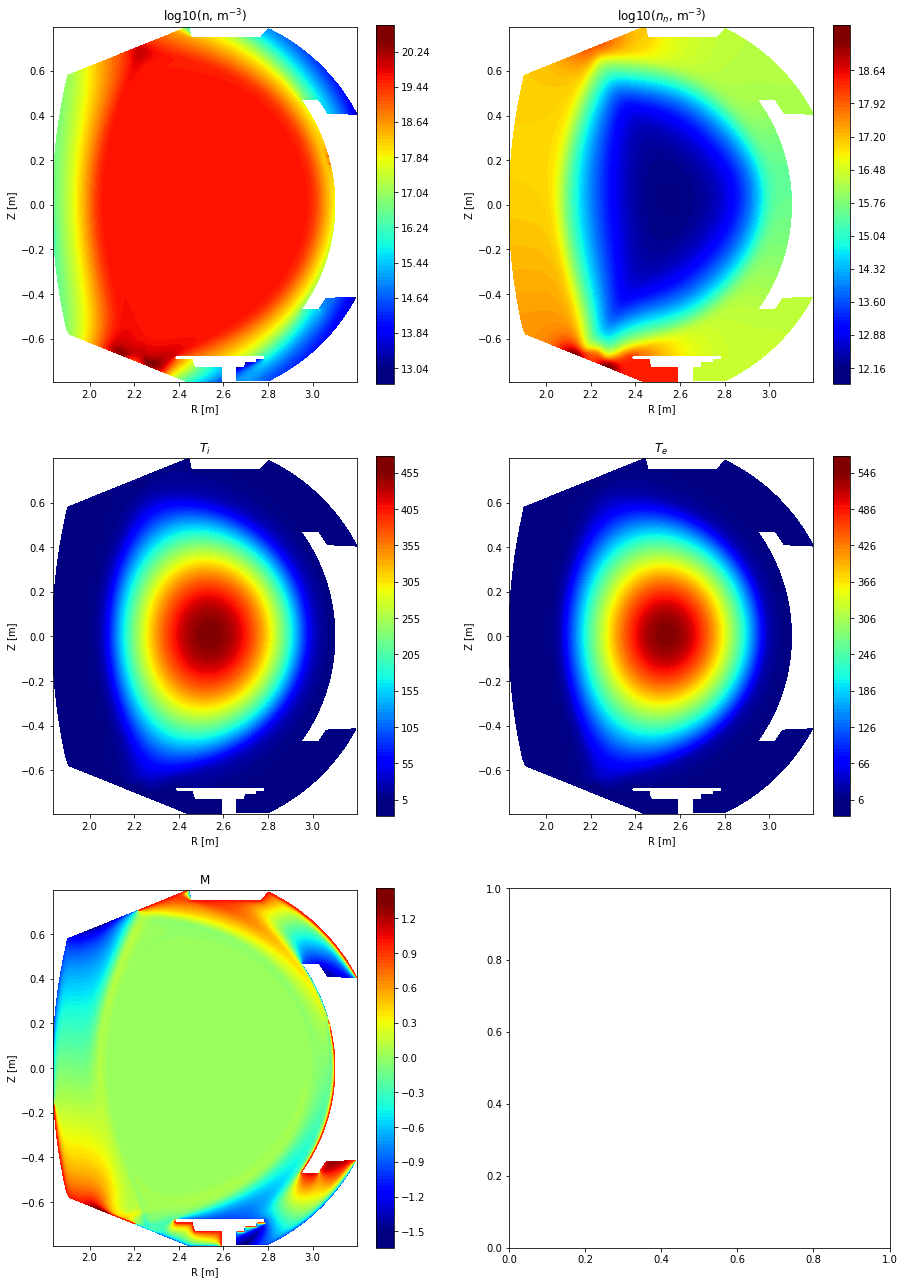

In [17]:

sol.plot_overview_physical()

# interpolators

If one just wants to calculate some physical variable in given point, the interpolators should be initialized

we should provide reference element to the mesh

In [18]:
import scipy
ref_elem = scipy.io.loadmat('data/reference_elements//reference_triangle_P4.mat')

In [19]:
ref_dic = {}
ref_dic['IPcoordinates'] = ref_elem['referenceelement'][0,0][0]  # gauss 2D points coordinates
ref_dic['IPweights'] = ref_elem['referenceelement'][0,0][1][:,0]  # gauss points 2D integration weights
ref_dic['N'] = ref_elem['referenceelement'][0,0][2]  # Shape functions 2D from nodal elements to Gauss points
ref_dic['Nxi'] = ref_elem['referenceelement'][0,0][3]  # Derivative by xi shape functions 2D from nodal elements to Gauss points
ref_dic['Neta'] = ref_elem['referenceelement'][0,0][4]  # Derivative by eta shape functions 2D from nodal elements to Gauss points
ref_dic['IPcoordinates1d'] = ref_elem['referenceelement'][0,0][5]  # gauss 1D points coordinates
ref_dic['IPweights1d'] = ref_elem['referenceelement'][0,0][6]  # gauss points 1D integration weights
ref_dic['N1d'] = ref_elem['referenceelement'][0,0][7]  # Shape functions 1D from nodal elements to Gauss points
ref_dic['N1dxi'] = ref_elem['referenceelement'][0,0][8]  # Derivative by xi shape functions 1D from nodal elements to Gauss points
ref_dic['faceNodes'] = ref_elem['referenceelement'][0,0][9] -1 # connectivity for face nodes
ref_dic['innerNodes'] = ref_elem['referenceelement'][0,0][10] -1 # points that are incide
ref_dic['faceNodes1d'] = ref_elem['referenceelement'][0,0][11] -1 # connectivity for face nodes in 1D
ref_dic['NodesCoord'] = ref_elem['referenceelement'][0,0][12] # coordinates of nodes of an element 
ref_dic['NodesCoord1d'] = ref_elem['referenceelement'][0,0][13]  # coordinates of nodes of in 1D
ref_dic['degree'] = ref_elem['referenceelement'][0,0][14]  # polynomial degree of an element
ref_dic['elemType'] = ref_elem['referenceelement'][0,0][15] # type of element 1 for triangle 0 for quadrangle

In [20]:
sol.mesh.reference_element = ref_dic

and then initialize the interpolators

It'll take a minute or so probably

In [21]:
sol.define_interpolators()

Defining an element number mask


plasma density

In [23]:
sol.n(2.5,0)

4.580400245198236e+19

ion temperature

In [24]:
sol.ti(2.5,0)

453.50411017795165

electron temperature

In [25]:
sol.te(2.5,0)

541.6807331952945

neutral density

In [26]:
sol.nn(2.5,0)

1452547152041.619

gradient of ti in 'x' (or R) direction

In [27]:
sol.grad_ti(2.5,0,'x')

164.35069449028862

parallel gradient of Ti

In [28]:
sol.grad_ti_par(2.5,0)

-0.002791345034070636

There are also sound speed, Mach number, gradents of te, particle_flux_par, ion_heat_flux_par, and number of others.... ask if needed or take a look in the end of the HDG_solution class file

## there is also useful method calculate_variables_along_line

for given set of points r and z and given variables from te list of available

 ['n','nn','te','ti','M','u',
  'p_dyn','q_i_par','q_e_par','gamma',
  'q_i_par_conv','q_i_par_cond',
  'q_e_par_conv','q_e_par_cond']

the method will give corresponding values in the desired points in a form of a dictionary

let's say we want midplane profile of plasma density and temperatures

In [32]:
z = np.zeros(1000)
r = np.linspace(sol.mesh.mesh_extent['minr'],sol.mesh.mesh_extent['maxr'],1000)
variables = ['n', 'ti','te']

In [33]:
profiles = sol.calculate_variables_along_line(r,z,variables)

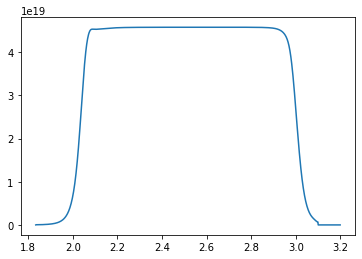

In [34]:
plt.plot(r,profiles['n'])

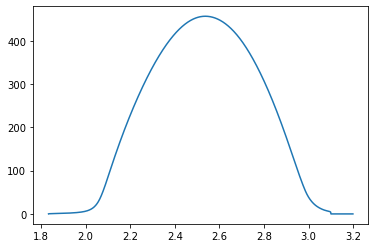

In [35]:
plt.plot(r,profiles['ti'])